## About Dataset

link https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset


This dataset contains details (including ingredients), images, and reviews of 241 ice cream flavors across 4 brands (Ben & Jerry's, Häagen-Dazs, Breyers, and Talenti). There are a total of 21,674 reviews, with each review containing star ratings and text. The data was collected directly from the brand websites: (i) https://www.benjerry.com/flavors/ice-cream-pints, (ii) https://www.haagendazs.us/products, (iii) https://www.breyers.com/us/en/products.html, (iv) https://www.talentigelato.com/product-category/talenti-gelato-flavors

## imports

In [58]:
import numpy as np
import pandas as pd
import kagglehub
import re
from nltk.stem import PorterStemmer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Load The Data

In [59]:
# Download latest version
path = kagglehub.dataset_download("tysonpo/ice-cream-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ice-cream-dataset' dataset.
Path to dataset files: /kaggle/input/ice-cream-dataset


In [60]:
# List the contents of the downloaded path and the 'combined' directory
print("Contents of downloaded path:", os.listdir(path))
combined_path = os.path.join(path, 'combined')
print("Contents of 'combined' directory:", os.listdir(combined_path))

# Construct the full path to the products CSV file
csv_file_path = os.path.join(combined_path, 'products.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to confirm it loaded correctly
display(df.head())

Contents of downloaded path: ['breyers', 'hd', 'talenti', 'bj', 'combined']
Contents of 'combined' directory: ['products.csv', 'reviews.csv', 'images']


,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


## Explore The Data

In [61]:
df

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
...,...,...,...,...,...,...,...,...
236,breyers,64_breyers,CINNABON®,NaN,Calling all cinnamon roll lovers! We teamed up...,4.0,28,"MILK, CORN SYRUP, SUGAR, BROWN SUGAR, SOYBEAN ..."
237,breyers,65_breyers,CarbSmart™ Caramel Swirl Bar,NaN,Watching your grams of sugar or carbs? Try our...,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
238,breyers,66_breyers,Layered Dessert S'mores,NaN,Calling all S'mores lovers! Make sure you don'...,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
239,breyers,67_breyers,Layered Dessert Peach Cobbler,NaN,Love peach cobbler topped with Breyers®? Then ...,3.2,38,"MILK, CORN SYRUP, ENRICHED WHEAT FLOUR, WHEAT ..."


In [62]:
df.isnull().sum()

,0
brand,0
key,0
name,0
subhead,184
description,4
rating,0
rating_count,0
ingredients,0


In [63]:
df.duplicated().sum()

np.int64(0)

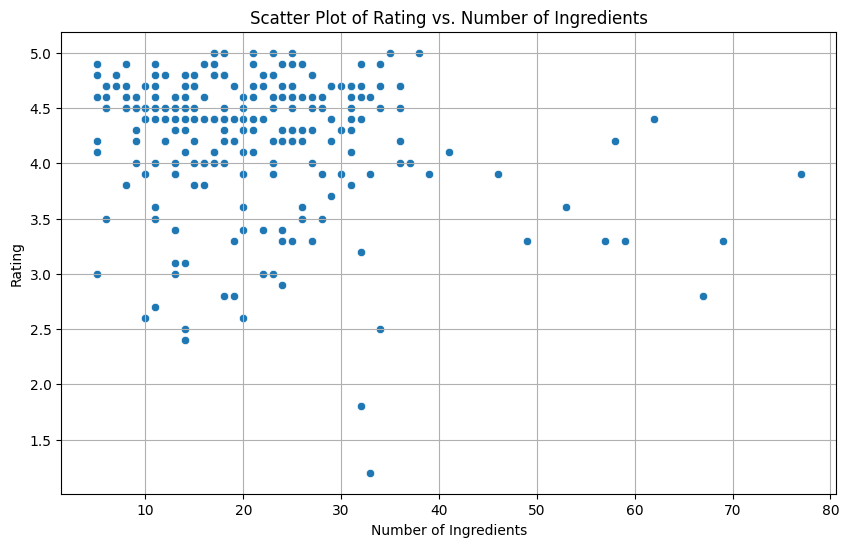

In [64]:
# Function to count ingredients in a string
def count_ingredients(ingredient_string):
    if isinstance(ingredient_string, str):
        # Split by comma and count, handling potential leading/trailing spaces
        return len([ingredient.strip() for ingredient in ingredient_string.split(',') if ingredient.strip()])
    return 0 # Return 0 for non-string values (e.g., NaN)

# Apply the function to create a new column 'ingredient_count'
df['ingredient_count'] = df['ingredients'].apply(count_ingredients)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ingredient_count', y='rating')
plt.title('Scatter Plot of Rating vs. Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

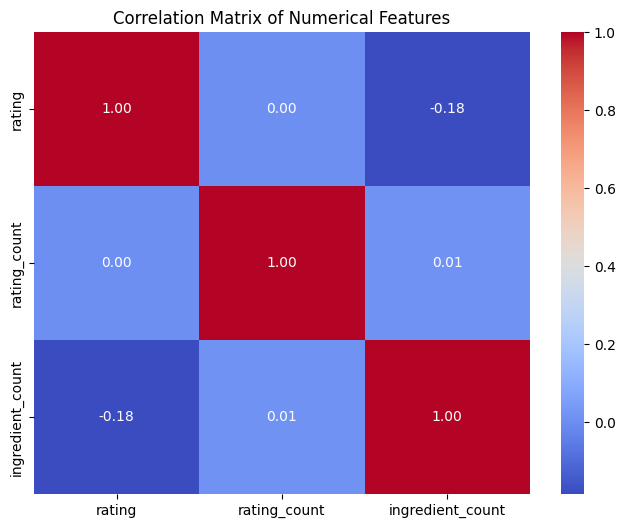

In [65]:
# Select only the numerical columns for correlation analysis
numerical_df = df[['rating', 'rating_count', 'ingredient_count']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Preprocessing


In [66]:
df.columns

Index(['brand', 'key', 'name', 'subhead', 'description', 'rating',
       'rating_count', 'ingredients', 'ingredient_count'],
      dtype='object')

this cols dont have that much of info

In [67]:
df = df.drop(columns=["key","name","subhead","description","ingredient_count"])

In [68]:
df

,brand,rating,rating_count,ingredients
0,bj,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
...,...,...,...,...
236,breyers,4.0,28,"MILK, CORN SYRUP, SUGAR, BROWN SUGAR, SOYBEAN ..."
237,breyers,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
238,breyers,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
239,breyers,3.2,38,"MILK, CORN SYRUP, ENRICHED WHEAT FLOUR, WHEAT ..."


In [69]:
df.query("rating_count < 10").index

Index([7, 11, 62, 101, 213], dtype='int64')

In [70]:
df = df.drop(df.query("rating_count < 10").index, axis=0).reset_index(drop=True)

In [71]:
df

,brand,rating,rating_count,ingredients
0,bj,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
...,...,...,...,...
231,breyers,4.0,28,"MILK, CORN SYRUP, SUGAR, BROWN SUGAR, SOYBEAN ..."
232,breyers,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
233,breyers,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
234,breyers,3.2,38,"MILK, CORN SYRUP, ENRICHED WHEAT FLOUR, WHEAT ..."


In [72]:
df.query("rating_count > 8").index  # Thats Good

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235],
      dtype='int64', length=236)

In [73]:
df = df.drop('rating_count',axis=1)

In [74]:
df["ingredients"][0]

'CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE'

you can build this with the help of of (Reg x 101)  search it on web or watch video on youtube

In [75]:
def process_ingredients(ingredients):
    ps = PorterStemmer()
    new_ingredients = re.sub(r'\(.*?\)', '', ingredients)
    new_ingredients = re.sub(r'CONTAINS:.*$', '', new_ingredients)
    new_ingredients = re.sub(r'\..*?:', ',', new_ingredients)
    new_ingredients = re.sub(r'( AND/OR )', ',', new_ingredients)
    new_ingredients = re.sub(r'( AND )', ',', new_ingredients)
    new_ingredients = new_ingredients.split(',')
    for i in range(len(new_ingredients)):
        new_ingredients[i] = new_ingredients[i].replace('†', '').replace('*', ' ').replace(')', '').replace('/', ' ')
        new_ingredients[i] = re.sub(r'^.+:', '', new_ingredients[i])
        new_ingredients[i] = ps.stem(new_ingredients[i].strip())
        if new_ingredients[i] == 'milk fat':
            new_ingredients[i] = 'milkfat'
    return new_ingredients

In [76]:
# Add all unique ingredients to all_ingredients

all_ingredients=set()  #    Set for get all unique ingredient

for row in df.iterrows():
    ingredients=process_ingredients(df.loc[row[0],'ingredients'])
    for ingredient in ingredients:
        if ingredient not in all_ingredients:
            all_ingredients.add(ingredient)

In [77]:
# Remove unwanted elements from all_ingredients if they exist
if '' in all_ingredients:
    all_ingredients.remove('')
if 'i' in all_ingredients:
    all_ingredients.remove('i')
if 'y' in all_ingredients:
    all_ingredients.remove('y')

In [78]:
sorted(all_ingredients, key=len,reverse=False)

['oat',
 'rum',
 'egg',
 'soy',
 'pgpr',
 'mono',
 'palm',
 'wine',
 'tbhq',
 'guar',
 'milk',
 'plum',
 'whey',
 'tara',
 'salt',
 'water',
 'mango',
 'cocoa',
 'cream',
 'coffe',
 'enzym',
 'reb a',
 'spice',
 'fruit',
 'wheat',
 'honey',
 'sugar',
 'toffe',
 'clove',
 'peach',
 'pecan',
 'butter',
 'pectin',
 'blue 2',
 'nutmeg',
 'ginger',
 'chocol',
 'molass',
 'leaven',
 'potato',
 'lactas',
 'almond',
 'raisin',
 'cherri',
 'lactos',
 'banana',
 'blue 1',
 'red 40',
 'niacin',
 'walnut',
 'peanut',
 'vanilla',
 'coconut',
 'milkfat',
 'whiskey',
 'annatto',
 'soybean',
 'dextrin',
 'pumpkin',
 'caramel',
 'dextros',
 'bourbon',
 'fructos',
 'lecithin',
 'color ad',
 'palm oil',
 'glycerin',
 'fudge co',
 'pineappl',
 'guar gum',
 'tara gum',
 'sea salt',
 'egg whit',
 'vermouth',
 'maltitol',
 'hazelnut',
 'sorbitol',
 'corn oil',
 'yellow 5',
 'sucralos',
 'egg yolk',
 'vanillin',
 'cinnamon',
 'yellow 6',
 'carob gum',
 'lemon oil',
 'pistachio',
 'green tea',
 'whole egg',
 '

In [79]:
process_ingredients(df.loc[0,'ingredients'])

['cream',
 'skim milk',
 'liquid sugar',
 'water',
 'brown sugar',
 'sugar',
 'milk',
 'wheat flour',
 'egg yolk',
 'corn syrup',
 'egg',
 'butter',
 'butteroil',
 'pectin',
 'sea salt',
 'soybean oil',
 'vanilla extract',
 'guar gum',
 'soy lecithin',
 'baking powd',
 'baking soda',
 'salt',
 'carrageenan',
 'lactas']

## Building and Training Model

In [80]:
X=df.drop('rating',axis=1)
y=df.loc[:,'rating']

In [81]:
def  onehot(df,cols,pref):
  df = df.copy()
  dummy = pd.get_dummies(df[cols], prefix=pref)
  df = pd.concat([df,dummy],axis=1)
  df.drop(cols,axis=1,inplace=True)
  # Convert boolean columns to integers
  for col in dummy.columns:
      df[col] = df[col].astype(int)
  return df

In [82]:
X=onehot(X,'brand','br')

In [83]:
X

,ingredients,br_bj,br_breyers,br_hd,br_talenti
0,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",1,0,0,0
1,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",1,0,0,0
2,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,...",1,0,0,0
3,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",1,0,0,0
4,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ...",1,0,0,0
...,...,...,...,...,...
231,"MILK, CORN SYRUP, SUGAR, BROWN SUGAR, SOYBEAN ...",0,1,0,0
232,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN...",0,1,0,0
233,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ...",0,1,0,0
234,"MILK, CORN SYRUP, ENRICHED WHEAT FLOUR, WHEAT ...",0,1,0,0


In [84]:
X['ingredients']=X['ingredients'].apply(process_ingredients)

In [85]:
ingredients_columns=[]

for list_ingredients in X['ingredients']:
    for ingredients in list_ingredients:
        if ingredients not in ingredients_columns :
            ingredients_columns.append(ingredients)

In [86]:
len(ingredients_columns)

354

In [87]:
ingredients_df=X['ingredients']

In [88]:
mlb=MultiLabelBinarizer()
ingredients_df=pd.DataFrame(mlb.fit_transform(ingredients_df))

In [89]:
ingredients_df

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X=pd.concat([X,ingredients_df],axis=1)

In [91]:
X=X.drop('ingredients',axis=1)

In [92]:
X

,br_bj,br_breyers,br_hd,br_talenti,0,1,2,3,4,5,...,344,345,346,347,348,349,350,351,352,353
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

## Results

In [94]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

model_rid= Ridge(alpha=100000)
model_rid.fit(X_train,y_train)

Ridge(alpha=100000)

In [95]:
model_rid.score(X_test,y_test)

-0.07238646893545875

In [96]:
model_las= Lasso(alpha=1000.0)
model_las.fit(X_train,y_train)


Lasso(alpha=1000.0)

In [97]:
model_las.score(X_test,y_test)

-0.07259242849377356

In [98]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
print("Dummy R²:", dummy.score(X_test, y_test))


Dummy R²: -0.07259242849377356


## See what wrong in the Data

In [102]:
import numpy as np
print("Variance in y_train:", np.var(y_train))
print("Variance in y_test:", np.var(y_test))


Variance in y_train: 0.39628503213957766
Variance in y_test: 0.32872842689942483


In [105]:
columns = df.columns

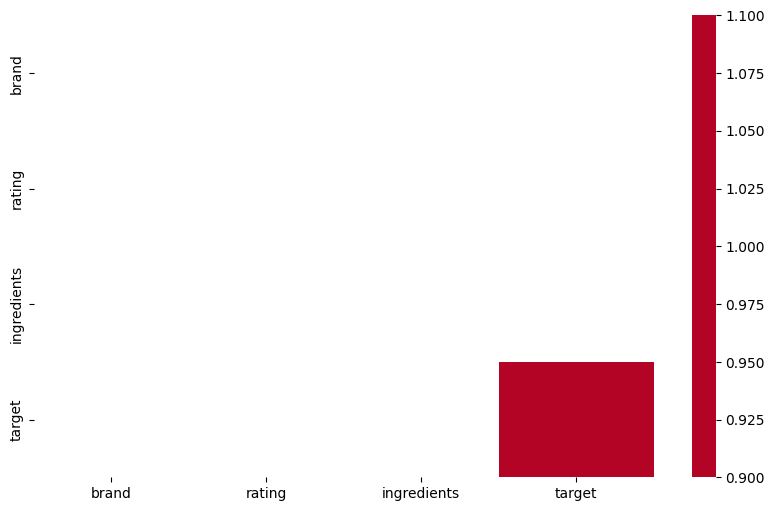

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X_train, columns=columns)  # replace feature_names with your columns
df["target"] = y_train

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.show()


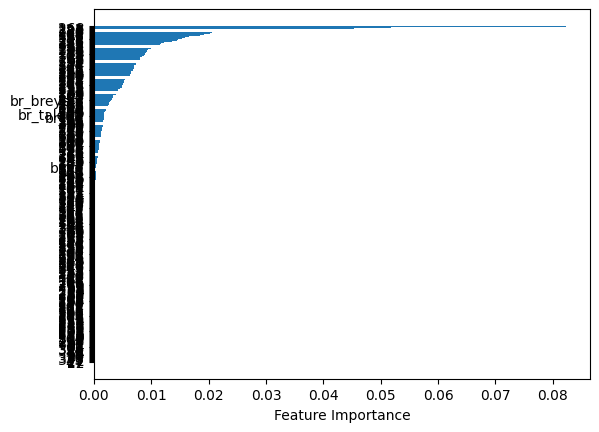

In [110]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
sorted_idx = importances.argsort()

plt.barh(df.columns[:-1][sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()
